In [3]:
import numpy as np
import scipy.spatial
from collections import Counter
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Initial Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
Predictions:
Instance: [6.1 2.8 4.7 1.2]
Predicted Cluster Label: 1

Instance: [5.7 3.8 1.7 0.3]
Predicted Cluster Label: 0

Instance: [7.7 2.6 6.9 2.3]
Predicted Cluster Label: 2

Instance: [6.  2.9 4.5 1.5]
Predicted Cluster Label: 1

Instance: [6.8 2.8 4.8 1.4]
Predicted Cluster Label: 1

Instance: [5.4 3.4 1.5 0.4]
Predicted Cluster Label: 0

Instance: [5.6 2.9 3.6 1.3]
Predicted Cluster Label: 1

Instance: [6.9 3.1 5.1 2.3]
Pre

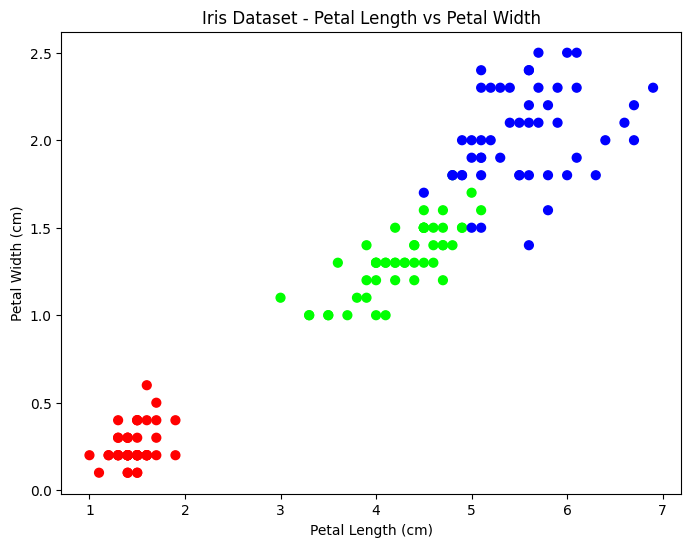

In [4]:
# Load the dataset from Google Drive
path = "/content/drive/MyDrive/ML LAB FINAL/KNN/iris.csv"
data = pd.read_csv(path)

# Print the initial dataset
print("Initial Dataset:")
print(data.head())

# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        # Compute the Euclidean distance between two points
        distance = scipy.spatial.distance.euclidean(X1, X2)
        return distance

    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(self.X_train)):
                # Calculate the distance between the test instance and all training instances
                dist = self.distance(self.X_train[j], X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for dist, j in d:
                # Get the class labels of the k nearest neighbors
                votes.append(self.y_train[j])
            # Determine the most common class label among the neighbors
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)

        return final_output

    def score(self, X_test, y_test):
        # Calculate the accuracy of the predictions
        predictions = self.predict(X_test)
        accuracy = (predictions == y_test).sum() / len(y_test)
        return accuracy


k = 3  # Specify the value of k for the KNN algorithm
knn = KNN(k)
knn.fit(X_train, y_train)

# Predict on the test data
predictions = knn.predict(X_test)
print("Predictions:")
for instance, prediction in zip(X_test, predictions):
    print("Instance:", instance)
    print("Predicted Cluster Label:", prediction)
    print()


# Calculate the accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2%}".format(accuracy))

# Plotting the Iris dataset
plt.figure(figsize=(8, 6))
colormap = np.array(['red', 'lime', 'blue'])
plt.scatter(X[:, 2], X[:, 3], c=colormap[y], s=40)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Iris Dataset - Petal Length vs Petal Width')
plt.show()


Initial Dataset:
   ID       x       y  cluster
0   0  24.412  32.932        2
1   1  35.190  12.189        1
2   2  26.288  41.718        2
3   3   0.376  15.506        0
4   4  26.116   3.963        1
Predictions:
Instance: [ 0.    24.412 32.932]
Predicted Cluster Label: 2

Instance: [ 5.    25.893 31.515]
Predicted Cluster Label: 2

Instance: [36.    26.878 36.609]
Predicted Cluster Label: 2

Instance: [45.    29.101 44.781]
Predicted Cluster Label: 2

Instance: [13.    25.768  5.967]
Predicted Cluster Label: 1

Instance: [54.    21.034 37.463]
Predicted Cluster Label: 2

Instance: [33.    25.994 34.444]
Predicted Cluster Label: 2

Instance: [48.    35.563 42.759]
Predicted Cluster Label: 2

Instance: [12.    35.477 35.104]
Predicted Cluster Label: 2

Instance: [57.    29.056 46.004]
Predicted Cluster Label: 2

Instance: [46.    30.671  9.294]
Predicted Cluster Label: 1

Instance: [50.     9.776 16.988]
Predicted Cluster Label: 0

Accuracy: 100.00%


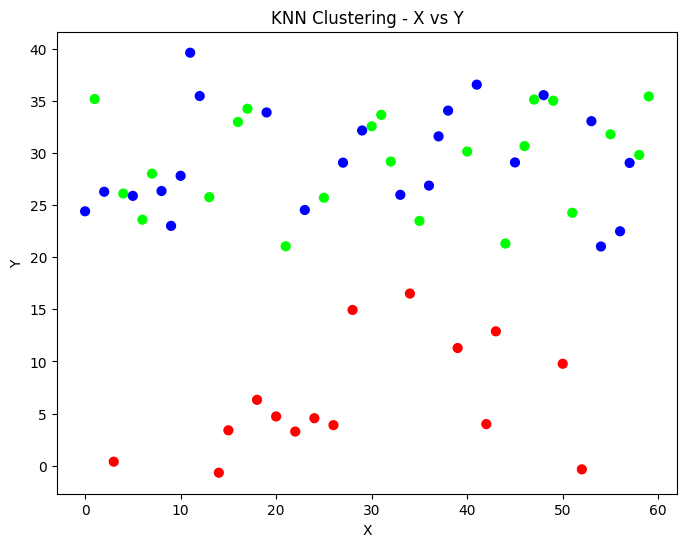

In [5]:
# Load the dataset from Google Drive
path = "/content/drive/MyDrive/ML LAB FINAL/KNN/kmeans_1BM20CS059.csv"
data = pd.read_csv(path)

# Print the initial dataset
print("Initial Dataset:")
print(data.head())

# Split the dataset into features (X) and target variable (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


class KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        # Compute the Euclidean distance between two points
        distance = scipy.spatial.distance.euclidean(X1, X2)
        return distance

    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []
            votes = []
            for j in range(len(self.X_train)):
                # Calculate the distance between the test instance and all training instances
                dist = self.distance(self.X_train[j], X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[0:self.k]
            for dist, j in d:
                # Get the class labels of the k nearest neighbors
                votes.append(self.y_train[j])
            # Determine the most common class label among the neighbors
            ans = Counter(votes).most_common(1)[0][0]
            final_output.append(ans)

        return final_output

    def score(self, X_test, y_test):
        # Calculate the accuracy of the predictions
        predictions = self.predict(X_test)
        accuracy = (predictions == y_test).sum() / len(y_test)
        return accuracy


k = 3  # Specify the value of k for the KNN algorithm
knn = KNN(k)
knn.fit(X_train, y_train)

# Predict on the test data
predictions = knn.predict(X_test)
print("Predictions:")
for instance, prediction in zip(X_test, predictions):
    print("Instance:", instance)
    print("Predicted Cluster Label:", prediction)
    print()


# Calculate the accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy: {:.2%}".format(accuracy))

# Plotting the dataset
plt.figure(figsize=(8, 6))
colormap = np.array(['red', 'lime', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=colormap[y], s=40)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('KNN Clustering - X vs Y')
plt.show()


In [6]:
import pandas as pd
import numpy as np
import math
import operator

# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/ML LAB FINAL/KNN/kmeans_1BM20CS059.csv")

# Print the first few rows of the dataset
print(data.head())

# Define a function that calculates the Euclidean distance between two data points
def euclideanDistance(data1, data2, length):
    distance = 0
    for x in range(length):
        distance += np.square(data1[x] - data2[x])
    return np.sqrt(distance)

# Define our KNN model
def knn(trainingSet, testSet, k):
    distances = {}
    length = len(testSet)

    # Calculating Euclidean distance between each row of training data and test data
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testSet, trainingSet.iloc[x], length)
        distances[x] = dist

    # Sorting them based on distance
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))

    neighbors = []

    # Extracting top k neighbors
    for x in range(k):
        neighbors.append(sorted_d[x][0])

    classVotes = {}

    # Determining the most frequent class in the neighbors array
    for x in range(len(neighbors)):
        response = trainingSet.iloc[neighbors[x]]['cluster']

        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1

    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0], neighbors

# Define the test set
testSet = [24.412, 32]

# Make predictions
print('\n\nWith 5 Nearest Neighbors\n')
k = 5
result, neighbors = knn(data, testSet, k)
print('Predicted class:', result)
print('Nearest Neighbors:', neighbors)


   ID       x       y  cluster
0   0  24.412  32.932        2
1   1  35.190  12.189        1
2   2  26.288  41.718        2
3   3   0.376  15.506        0
4   4  26.116   3.963        1


With 5 Nearest Neighbors

Predicted class: 2.0
Nearest Neighbors: [27, 29, 30, 19, 25]


In [7]:
# Define the actual classes
actualClasses = data['cluster']

# Calculate the predicted classes using the KNN model
predictedClasses = []

for idx in range(len(data)):
    testSet = [data.iloc[idx]['x'], data.iloc[idx]['y']]
    result, _ = knn(data, testSet, k)
    predictedClasses.append(result)

# Compute accuracy
accuracy = (predictedClasses == actualClasses).sum() / len(data) * 100

# Compute precision, recall, and F1-score
from sklearn.metrics import classification_report

print('Accuracy:', accuracy)
print(classification_report(actualClasses, predictedClasses))


Accuracy: 28.333333333333332
              precision    recall  f1-score   support

           0       0.04      0.07      0.05        15
           1       0.00      0.00      0.00        22
           2       0.55      0.70      0.62        23

    accuracy                           0.28        60
   macro avg       0.20      0.25      0.22        60
weighted avg       0.22      0.28      0.25        60



In [8]:
import math
import pandas as pd
import numpy as np
from random import choice
from matplotlib import pyplot
from google.colab import drive

drive.mount("/content/drive")

def Euclidean_distance(row1, row2):
    distance = 0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return math.sqrt(distance)

def Get_Neighbors(train, test_row, num):
    distance = []
    data = []
    for i in train:
        dist = Euclidean_distance(test_row, i)
        distance.append(dist)
        data.append(i)
    distance = np.array(distance)
    data = np.array(data)
    index_dist = distance.argsort()
    data = data[index_dist]
    neighbors = data[:num]
    return neighbors

def predict_classification(train, test_row, num):
    Neighbors = Get_Neighbors(train, test_row, num)
    Classes = [i[-1] for i in Neighbors]
    prediction = max(Classes, key=Classes.count)
    return prediction

path = "/content/drive/MyDrive/ML LAB/LAB-7/kmeans_1BM20CS059.csv"
dataset = pd.read_csv(path)

# Modifying the test array according to your requirements
test = [60, 150]

# Number of nearest neighbors
k = 4

# Getting the predicted cluster
prediction = predict_classification(dataset.values.tolist(), test, k)

print("Predicted Cluster: {}".format(prediction))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Predicted Cluster: 1.0
